In [1]:
import pandas as pd
import collections
import matplotlib.pyplot as plt
import numpy as np
import string
import nltk
from nltk.util import ngrams
from sklearn.model_selection import train_test_split
pd.set_option('display.max_column',4000)
pd.set_option('display.max_row',4000)

In [2]:
from nltk.corpus import gutenberg
from nltk.corpus import brown




In [44]:
def findperplexity_KN(text_tr,text_te,label):
    
    
    text_tr,text_cv=train_test_split(text_tr,test_size=.20,random_state=4)
    words_tr=[]
    for i in range(len(text_tr)):
        words_tr.extend(text_tr[i])
    word_counts=len(words_tr)
    
    
    unigram=collections.Counter(words_tr)
    list_count_1=[word for word in unigram.keys() if unigram[word]==1]
    list_count_1_len=len(list_count_1)

    list_count_1=list_count_1[:1000]
    list_count_1_dic=dict(collections.Counter(list_count_1))
    for i in range(word_counts):
        if(list_count_1_dic.get(words_tr[i],"empty")!="empty"):
            words_tr[i]='<UNK>'
    
    
    bigram = ngrams(words_tr,2)
    bgcounter=dict(collections.Counter(bigram))
    del bgcounter[('<e>','<s>')]
    bg_keys=list(bgcounter.keys())
    total_bigram_types=len(bg_keys)
    #print(bgcounter)
    
    ugcounter=dict(collections.Counter(words_tr))
    ug_keys=list(ugcounter.keys())
    #print(ugcounter)
    
    
    count_second={}
    count_first={}
    for i in ug_keys:
        count_first[i]=0
        count_second[i]=0
    for i in bg_keys:
        count_first[i[0]]=count_first[i[0]]+1
        count_second[i[1]]=count_second[i[1]]+1
    Pcont={}
    norm_constant={}
    for i in ug_keys:
        Pcont[i]=count_second[i]/total_bigram_types
    
    
    words_cv=[]
    for i in range(np.size(text_cv)):
        words_cv.extend(text_cv[i])
    count=0
    for i in range(len(words_cv)):
        if(words_cv[i] not in ugcounter):
            words_cv[i]='<UNK>'
        if(words_cv[i]=='<s>'):
            count=count+1
        
            
    N=len(words_cv)-count
    
    perp_list=[]
    for d in [i/20 for i in range(1,21)]:
        Interpolated_Kneser_Ney_dict={}
        for i in ug_keys:
            norm_constant[i]=(d*(count_first[i]))/ugcounter[i]
        
        for i in range(len(words_cv)-1):
            if(i==0):
                perp=1
            if(words_cv[i]=='<e>' and words_cv[i+1]=='<s>'):
                perp=perp
            else:
                x=(words_cv[i],words_cv[i+1])
                if(Interpolated_Kneser_Ney_dict.get(x,"empty")=="empty"):
                    discount=d
                    Interpolated_Kneser_Ney_dict[x]= max((bgcounter.get(x,0)-discount),0)/ugcounter[x[0]]+norm_constant[x[0]]*Pcont[x[1]]
                perp=perp*((1/Interpolated_Kneser_Ney_dict[x])**(1/N))
        perp_list.append(perp)
    perp_cv_min=min(perp_list)
    index=perp_list.index(perp_cv_min)
    discount_list=[i/20 for i in range(1,21)]
    discount_final=discount_list[index]
    print("The lowest perplexity in cross validation set is {} corresponding to discount of {} when {}".format(perp_cv_min,discount_final,label))
         
    plt.grid() # grid on
    plt.plot(discount_list,perp_list,label=label)
    plt.ylabel('perplexity')
    plt.xlabel('discount')
    plt.legend()
    
    
    
    
    
    
    
    
    for i in ug_keys:
            norm_constant[i]=(discount_final*(count_first[i]))/ugcounter[i]
    words_te=[]
    for i in range(len(text_te)):
        words_te.extend(text_te[i])
    count=0
    for i in range(len(words_te)):
        if(words_te[i] not in ugcounter):
            words_te[i]='<UNK>'
        if(words_te[i]=='<s>'):
            count=count+1
        
            
    N=len(words_te)-count
    Interpolated_Kneser_Ney_dict={}
    for i in range(len(words_te)-1):
        if(i==0):
            perp=1
        if(words_te[i]=='<e>' and words_te[i+1]=='<s>'):
            perp=perp
        else:
            x=(words_te[i],words_te[i+1])
            if(Interpolated_Kneser_Ney_dict.get(x,"empty")=="empty"):
                Interpolated_Kneser_Ney_dict[x]= max((bgcounter.get(x,0)-discount_final),0)/ugcounter[x[0]]+norm_constant[x[0]]*Pcont[x[1]]
            perp=perp*((1/Interpolated_Kneser_Ney_dict[x])**(1/N))
    return perp




In [58]:
def findperplexity_katz(text_tr,text_te,label):
    
    text_tr,text_cv=train_test_split(text_tr,test_size=.20,random_state=4)
    words_tr=[]
    for i in range(len(text_tr)):
        words_tr.extend(text_tr[i])
    word_counts=len(words_tr)
    
    
    unigram=collections.Counter(words_tr)
    list_count_1=[word for word in unigram.keys() if unigram[word]==1]
    list_count_1_len=len(list_count_1)
    list_count_1=list_count_1[:1000]
    list_count_1_dic=dict(collections.Counter(list_count_1))
    for i in range(word_counts):
        if(list_count_1_dic.get(words_tr[i],"empty")!="empty"):
            words_tr[i]='<UNK>'
    
    
    bigram = ngrams(words_tr,2)
    bgcounter=dict(collections.Counter(bigram))
    del bgcounter[('<e>','<s>')]
    bg_keys=list(bgcounter.keys())
    bg_values=list(bgcounter.values())
    total_bigram_types=len(bg_keys)
#print(bgcounter)


    ugcounter=dict(collections.Counter(words_tr))
    ug_keys=list(ugcounter.keys())
    ug_values=list(ugcounter.values())
    sum_ug_values=np.sum(ug_values)
    
    alpha={}
    for ug in ug_keys:
        alpha[ug]=0
    for bg in bg_keys:
        alpha[bg[0]]=alpha[bg[0]]+bgcounter[bg]-.75
    

    alpha={k:(1-(v/ugcounter[k])) for k,v in alpha.items()}



    sum_count={}

    for ug in ug_keys:
        sum_count[ug]=sum_ug_values
    for bg in bg_keys:
        sum_count[bg[0]]=sum_count[bg[0]]-ugcounter[bg[1]]
    
    
    
    words_cv=[]
    for i in range(len(text_cv)):
        words_cv.extend(text_cv[i])
    for i in range(len(words_cv)):
        if(words_cv[i] not in ugcounter):
            words_cv[i]='<UNK>'
            
    N=len(words_cv)-words_cv.count('<s>')
    
    perp_list=[]
    for d in [i/20 for i in range(1,21)]:
        for ug in ug_keys:
            alpha[ug]=0
        for bg in bg_keys:
            alpha[bg[0]]=alpha[bg[0]]+bgcounter[bg]-d
        alpha={k:(1-(v/ugcounter[k])) for k,v in alpha.items()}
        for i in range(len(words_cv)-1):
            if(i==0):
                perp=1
            if(words_cv[i]=='<e>' and words_cv[i+1]=='<s>'):
                perp=perp
            else:
                x=(words_cv[i],words_cv[i+1])
                prob=max((bgcounter.get(x,0)-d),0)/ugcounter[x[0]]
                if(prob==0):
                    prob=(alpha[x[0]]*ugcounter[x[1]])/sum_count[x[0]]
                perp=perp*((1/prob)**(1/N))
        perp_list.append(perp)
    perp_cv_min=min(perp_list)
    index=perp_list.index(perp_cv_min)
    discount_list=[i/20 for i in range(1,21)]
    discount_final=discount_list[index]
    print("The lowest perplexity in cross validation set is {} corresponding to discount of {} when {}".format(perp_cv_min,discount_final,label))
         
    plt.grid() # grid on
    plt.plot(discount_list,perp_list,label=label)
    plt.ylabel('perplexity')
    plt.xlabel('discount')
    plt.legend()
        
    
    
    

    for ug in ug_keys:
        alpha[ug]=0
    for bg in bg_keys:
        alpha[bg[0]]=alpha[bg[0]]+bgcounter[bg]-discount_final
    alpha={k:(1-(v/ugcounter[k])) for k,v in alpha.items()}
    words_te=[]
    for i in range(len(text_te)):
        words_te.extend(text_te[i])
    for i in range(len(words_te)):
        if(words_te[i] not in ugcounter):
            words_te[i]='<UNK>'
            
    N=len(words_te)-words_te.count('<s>')
    for i in range(len(words_te)-1):
        if(i==0):
            perp=1
        if(words_te[i]=='<e>' and words_te[i+1]=='<s>'):
            perp=perp
        else:
            x=(words_te[i],words_te[i+1])
            prob=max((bgcounter.get(x,0)-discount_final),0)/ugcounter[x[0]]
            if(prob==0):
                prob=(alpha[x[0]]*ugcounter[x[1]])/sum_count[x[0]]
            perp=perp*((1/prob)**(1/N))
    return perp
    

In [5]:
text_gutenberg=list(gutenberg.sents())
text_brown=list(brown.sents())


In [6]:
text_gutenberg_size=len(text_gutenberg)
text_brown_size=len(text_brown)

In [7]:
for i in range(text_gutenberg_size):
    text_gutenberg[i].insert(0,"<s>")
    text_gutenberg[i].insert(len(text_gutenberg[i]),'<e>')

In [8]:
for i in range(text_brown_size):
    text_brown[i].insert(0,"<s>")
    text_brown[i].insert(len(text_brown[i]),'<e>')

In [9]:
text_brown_tr,text_brown_te=train_test_split(text_brown,test_size=.20,random_state=4)

text_gutenberg_tr,text_gutenberg_te=train_test_split(text_gutenberg,test_size=.20,random_state=4)


The lowest perplexity in cross validation set is 296.9048126811205 corresponding to discount of 0.8 when training corpus is brown
297.5913419751577
The lowest perplexity in cross validation set is 153.73771507905366 corresponding to discount of 0.75 when training corpus is gutenberg
156.40325677152754
The lowest perplexity in cross validation set is 212.43986909679245 corresponding to discount of 0.8 when training corpus is brown and gutenberg
379.1320601823221


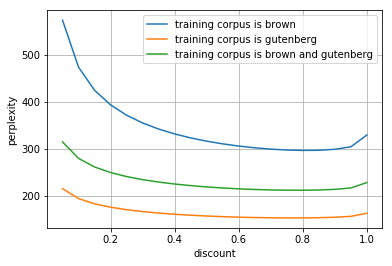

The lowest perplexity in cross validation set is 212.43986909679245 corresponding to discount of 0.8 when training corpus is brown and gutenberg
167.66800125949797
The lowest perplexity in cross validation set is 319.75217711060503 corresponding to discount of 0.7 when training corpus is brown
320.269289425
The lowest perplexity in cross validation set is 163.20181667409582 corresponding to discount of 0.65 when training corpus is gutenberg
166.31455148
The lowest perplexity in cross validation set is 225.5007172058336 corresponding to discount of 0.65 when training corpus is brown and gutenberg
417.960180339


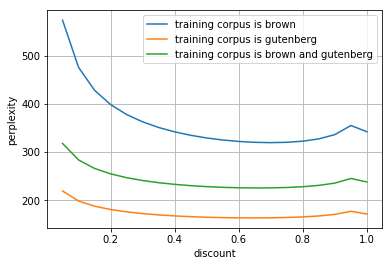

The lowest perplexity in cross validation set is 225.5007172058336 corresponding to discount of 0.65 when training corpus is brown and gutenberg
175.14707436


In [60]:
plt.close()
print(findperplexity_KN(text_brown_tr,text_brown_te,"training corpus is brown"))
print(findperplexity_KN(text_gutenberg_tr,text_gutenberg_te,"training corpus is gutenberg"))
print(findperplexity_KN(text_brown_tr+text_gutenberg_tr,text_brown_te,"training corpus is brown and gutenberg"))
plt.show()
plt.close()
print(findperplexity_KN(text_brown_tr+text_gutenberg_tr,text_gutenberg_te,"training corpus is brown and gutenberg"))
plt.close()
print(findperplexity_katz(text_brown_tr,text_brown_te,"training corpus is brown"))
print(findperplexity_katz(text_gutenberg_tr,text_gutenberg_te,"training corpus is gutenberg"))
print(findperplexity_katz(text_brown_tr+text_gutenberg_tr,text_brown_te,"training corpus is brown and gutenberg"))
plt.show()
plt.close()
print(findperplexity_katz(text_brown_tr+text_gutenberg_tr,text_gutenberg_te,"training corpus is brown and gutenberg"))